#Experience AI
##Hands-on Expertise in Machine Learning & Deep Learning

##Overview of the notebook

### . Have your images folders ready and connect it

### . Building a simple CNN model for Cat Dog classification


> Step 1: Setup libraries

> Step 2: Load and pre-process data

> Step 3: Create CNN model

> Step 4: Compile model

> Step 5: Train model

> Step 6: Save/Load model

> Step 7: Evaluate model

### C. Training state-of-the-art network

> Step 1: Import Library

> Step 2: Create Model using ResNet50 Architecture

> Step 3: Compile Model

> Step 4: Train Model

> Step 5: Evaluate Model

### D. Transfer learning from ImageNet and fine-tuning on our dataset

> Step 1. Preprocess Dataset w.r.t ResNet architecture

> Step 2. Load the ResNet50 architecture with Pretrained ImageNet weights

> Step 3. Modify ResNet50 architecture

> Step 4. Compile ResNet50 architecture

> Step 5. Train ResNet50 architecture

### E. Fine Tuning ResNet50 Architecture

> Step 1. Set Trainable Parameters

> Step 2. Compile Model

> Step 3. Train Model

# A. Connect your images folder for classificaton


# B. Building a simple CNN model for Cat Dog classification

## Step 1: Import libraries

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

#Import Image Data Generator, which allow us to create data generator for images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Step 2: Load and pre-process data

In [2]:
#Define Parameters for Model Training
imgSize = 224 #Set Image size to be used as model input
imgChannel = 3 #Set no. of channel in image i.e. 1 if grayscale, 3 if RGB
batch_size = 32 #Set number of images to be used as a set of model training/validation/testing
eps = 50 #Set number of epoches to train the model

# Create an Image Data Generator
input_imgen = ImageDataGenerator(rotation_range=0, width_shift_range=0.0,
                                  height_shift_range=0.0, shear_range=0.0, zoom_range=0.0,
                                  fill_mode='nearest', rescale = 1./255,
                                  validation_split=0.1)

trainDir = './catsvsdogs/train/' #Specify path of training data directory
testDir = './catsvsdogs/test/' #Specify path of testing data directory

#Tell Image generator to load data from given directory and preprocess data with the mentioned properties

print('Training Dataset:')
trainGen = input_imgen.flow_from_directory(
      directory = trainDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=True, #Set whether to shuffle dataset after every epoch
      subset='training', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

print('\nValidation Dataset:')
validGen = input_imgen.flow_from_directory(
      directory = trainDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=True, #Set whether to shuffle dataset after every epoch
      subset='validation', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

print('\nTest Dataset:')
testGen = input_imgen.flow_from_directory(
      directory = testDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=False, #Set whether to shuffle dataset after every epoch
      #subset='validation', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

#Run this code to check the values assigned to each class
label_map = (trainGen.class_indices)
print('\nValue assigned to each class: ',label_map)

Training Dataset:
Found 0 images belonging to 2 classes.

Validation Dataset:
Found 0 images belonging to 2 classes.

Test Dataset:
Found 0 images belonging to 2 classes.

Value assigned to each class:  {'cat': 0, 'dog': 1}


IndexError: ignored

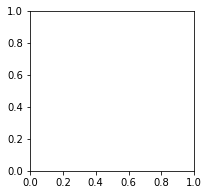

In [3]:
#Run this code to pick one batch from the training dataset
images,labels = next(trainGen)

#Display some glimpse of the picked batch data
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(int(labels[i]))
    plt.axis("off")

## Step 3: Create CNN model

Creating model using Sequential API

In [ ]:
# This code generate model using sequential model technique
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(imgSize,imgSize,imgChannel), padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D( 64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
#Global Average Pooling (GAP) is a pooling operation designed to replace fully connected layers in classical CNNs
#In GAP, we take average value of the last feature map and flatten it into 1 dimensional hot-vector
model.add(GlobalAveragePooling2D()) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Creating model using Functional API

In [ ]:
# # This code generate model using functional model technique
# img_input = Input(shape=(imgSize, imgSize, imgChannel))
# conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(img_input)
# conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(conv1)
# maxpool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)
# conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(maxpool1)
# conv4 = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(conv3)
# maxpool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)
# gap1 = GlobalAveragePooling2D()(maxpool2)
# dense1 = Dense(64, activation='relu')(gap1)
# dropout1 = Dropout(0.2)(dense1)
# model_output = Dense(1, activation='sigmoid')(dropout1)

# model = Model(img_input, model_output)
# model.summary()

## Step 4: Compile Model

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Step 5: Train model

In [ ]:
history = model.fit(trainGen, 
                    batch_size=batch_size, 
                    epochs=20, 
                    shuffle=True, 
                    validation_data=validGen)

##Plot model performance curves

In [ ]:
plt.style.use('seaborn')

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Step 6: Load/Save Model

The trained model can be saved to google drive using this code

In [ ]:
# model.save('/content/drive/MyDrive/ClassificationExample/custom_model_50epoch.h5')

The trained model can also be loaded from google drive using this code for furture use, run this code to load model

In [ ]:
# model = keras.models.load_model("/content/drive/MyDrive/ClassificationExample/custom_model_50epoch.h5")

## Step 7: Evaluate Model

In [ ]:
#Use the trained model to make prediction on test dataset
y_pred = model.predict(testGen,verbose=1)

#Run this line to evaluate the model accuracy and loss on test dataset
b = model.evaluate(testGen)

In [ ]:
#Apply threshold of 50% to round the results values
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

#Convert the array results to 1 dimensional hot vector, so that it can be used to compare with test dataset ground truth labels
y_pred = y_pred.flatten()

#Get the labels of the ground truth test dataset
y_true = testGen.classes

#Evaluate the model performance using metrics and display results
print('\nConfusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('\nClassification Report')
print(classification_report(y_true, y_pred, digits=4))

In [ ]:
#Pick one batch of the test dataset
images,labels = next(testGen)

y_pred_batch = model.predict(images)

#Show some glimpse of the model prediction along with input test images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(int(y_pred_batch[i]))
    plt.axis("off")

# C. Training state-of-the-art networks

## Step 1: Import Library

In [ ]:
#Import state-of-the-art ResNet50 architecture and input data preprocessing function
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

## Step 2: Create Model using ResNet50 Architecture

In [ ]:
ResNet = ResNet50(weights=None, include_top = False,input_shape=(224,224,3))
ResNet.summary()

In [ ]:
#Modify ResNet50 architecture according to our requirement (Cat, Dog Classification)
x =  ResNet.output
GAP = GlobalAveragePooling2D()(x)
drop = Dropout(0.2)(GAP)
out = Dense(1, activation='sigmoid')(drop)

ResNet = Model(inputs = ResNet.input, outputs = out)
ResNet.summary()

## Step 3: Compile Model

In [ ]:
ResNet.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Step 4: Train Model

In [ ]:
history = ResNet.fit(trainGen, 
                    batch_size=batch_size,
                    epochs=10, 
                    shuffle=True,
                    validation_data=validGen)

Plot ResNet50 model performance curve

In [ ]:
plt.style.use('seaborn')

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Step 5: Evaluate Model

In [ ]:
#Use the trained model to predict the results on test dataset
y_pred = ResNet.predict(testGen,verbose=1)

#Run this line to evaluate the model accuracy and loss on test dataset
b = ResNet.evaluate(testGen)

In [ ]:
#Apply threshold of 50% to round the results values
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

#Convert the array results to 1 dimensional hot vector, so that it can be used to compare with test dataset ground truth labels
y_pred = y_pred.flatten()

#Get the labels of the ground truth test dataset
y_true = testGen.classes

#Evaluate the model performance using metrics and display results
print('\nConfusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('\nClassification Report')
print(classification_report(y_true, y_pred, digits=4))

In [ ]:
#Run this code to pick one batch from the training dataset
images,labels = next(trainGen)
y_pred_batch = ResNet.predict(images)

#Display some glimpse of the picked batch data
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])#.astype(np.uint8))
    plt.title(int(y_pred_batch[i]))
    plt.axis("off")

# D. Transfer learning from ImageNet and fine-tuning on our dataet

## Step 1. Preprocess Dataset w.r.t ResNet architecture

ResNet use **"preprocess_input"** function to preprocess dataset

In [ ]:
input_imgen = ImageDataGenerator( rotation_range=0, width_shift_range=0.0,
                                  height_shift_range=0.0, shear_range=0.0, zoom_range=0.0,
                                  fill_mode='nearest', rescale=None,
                                  preprocessing_function=preprocess_input,
                                  validation_split=0.1) #Define Image Generator
                                 
print('Training Dataset:')
trainGen = input_imgen.flow_from_directory(
      directory = trainDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=True, #Set whether to shuffle dataset after every epoch
      subset='training', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

print('\nValidation Dataset:')
validGen = input_imgen.flow_from_directory(
      directory = trainDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=True, #Set whether to shuffle dataset after every epoch
      subset='validation', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

print('\nTest Dataset:')
testGen = input_imgen.flow_from_directory(
      directory = testDir, #Path to directory
      target_size = (imgSize,imgSize), #Resize the images resolution to the desired size
      color_mode = 'rgb', #Specify color mode i.e. RGB or Grayscale image
      class_mode = 'binary', #Specify type of output, i.e. Binary for 2 classes, Categorical for more than 2 classes
      batch_size = batch_size, #Specify batch size to be used
      shuffle=False, #Set whether to shuffle dataset after every epoch
      #subset='validation', #Specifiy the set of dataset
      classes=["cat","dog"]) #Specify which classes should be considered in generator

## Step 2. Load the ResNet50 architecture with Pretrained ImageNet weights

In [ ]:
ResNet = ResNet50(weights='imagenet', include_top = False,input_shape=(224,224,3))

##Step 3. Modify ResNet50 architecture

In [ ]:
for layer in ResNet.layers:
  layer.trainable = False

x =  ResNet.output
GAP = GlobalAveragePooling2D()(x)
drop = Dropout(0.2)(GAP)
out = Dense(1, activation='sigmoid')(drop)

ResNet = Model(inputs = ResNet.input, outputs = out)
ResNet.summary()

##Step 4. Compile ResNet50 architecture

In [ ]:
ResNet.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

##Step 5. Train ResNet50 architecture

In [ ]:
history = ResNet.fit(trainGen, 
                    batch_size=batch_size,
                    epochs=5, 
                    shuffle=True,
                    validation_data=validGen)

#E. Fine Tuning ResNet50 Architecture

##Step 1. Set Trainable Parameters

In [ ]:
ResNet.trainable = True
ResNet.summary()

##Step 2. Compile Model

In [ ]:
ResNet.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate = 1e-5),
              metrics=['accuracy'])

##Step 3. Train Model

In [ ]:
history = ResNet.fit(trainGen, 
                    batch_size=batch_size, 
                    #steps_per_epoch=len(trainGen)/batch_size, 
                    epochs=5, 
                    shuffle=True, 
                    #validation_steps=len(validGen)/batch_size, 
                    validation_data=validGen)

In [ ]:
plt.style.use('seaborn')

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()